# Data visulaization

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

# 명령 결과 모두 보기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## 1. Categorical variable (univariate)

In [44]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [46]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [51]:
object_columns = titanic.columns[titanic.dtypes == 'object']

In [53]:
for col in object_columns:
    titanic[col] = titanic[col].astype('category')

In [54]:
category_columns = titanic.columns[titanic.dtypes == 'category']
category_columns

Index(['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'], dtype='object')

In [57]:
def bar_plot(variable):
    var =titanic[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    
    plt.show()
    print("{}: \n {}".format(variable,varValue))

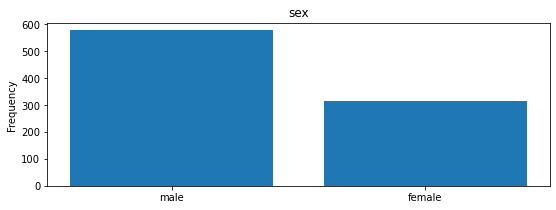

sex: 
 male      577
female    314
Name: sex, dtype: int64


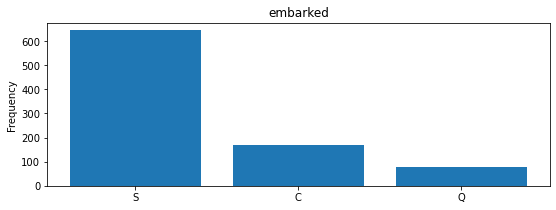

embarked: 
 S    644
C    168
Q     77
Name: embarked, dtype: int64


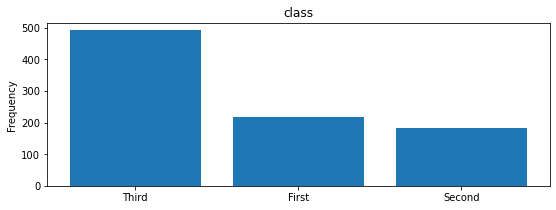

class: 
 Third     491
First     216
Second    184
Name: class, dtype: int64


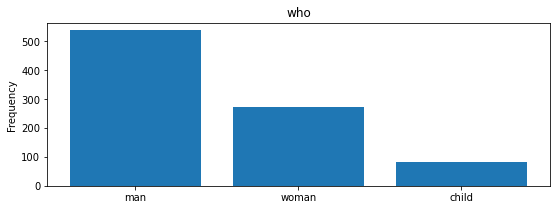

who: 
 man      537
woman    271
child     83
Name: who, dtype: int64


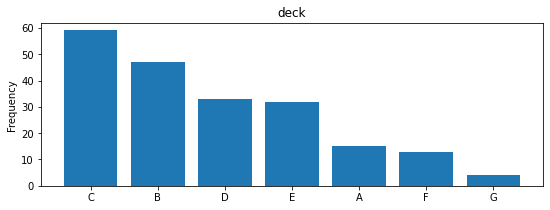

deck: 
 C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64


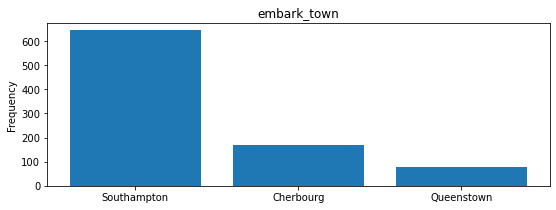

embark_town: 
 Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64


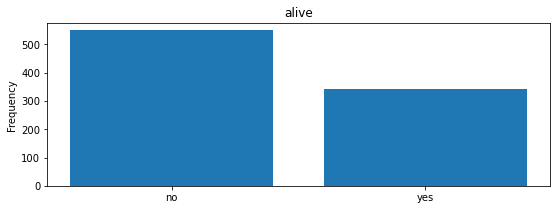

alive: 
 no     549
yes    342
Name: alive, dtype: int64


In [58]:
for c in category_columns:
    bar_plot(c)

## 2. Numerical variable (univariate)

In [59]:
from sklearn.datasets import fetch_california_housing
fetch_california_housing()

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [60]:
df = fetch_california_housing()
df.feature_names.extend(df.target_names)
df = pd.DataFrame(np.c_[df.data, df.target], columns = df.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [69]:
df.columns[df.dtypes == 'float']

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [70]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(df[variable], bins=40)
    plt.xlabel(variable)
    plt.ylabel("frequency")
    plt.title("{} distrubition with hist".format(variable))
    plt.show()

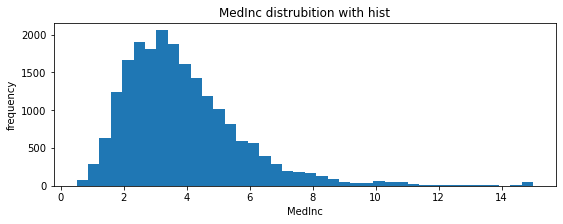

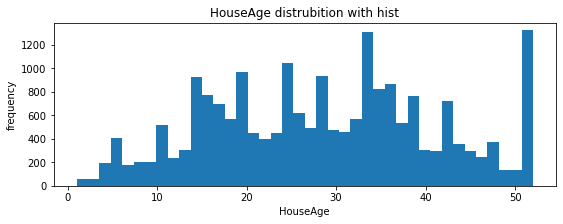

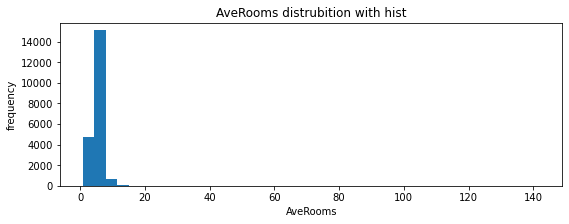

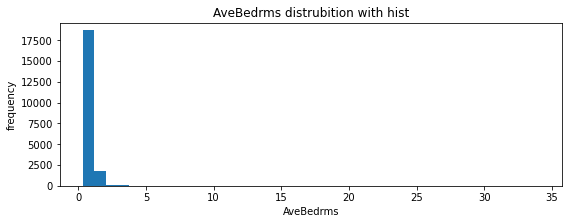

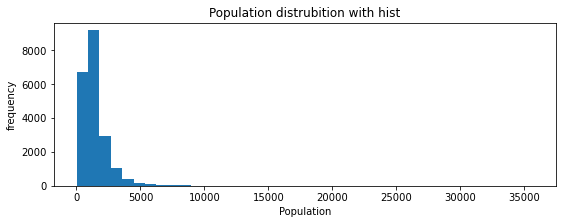

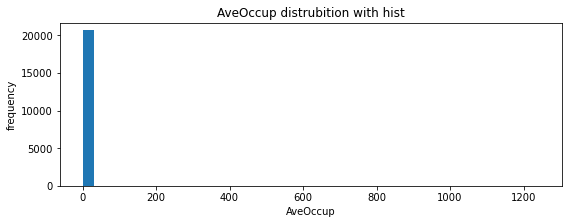

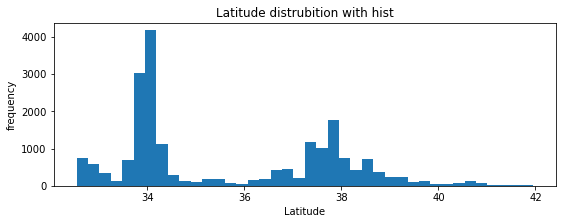

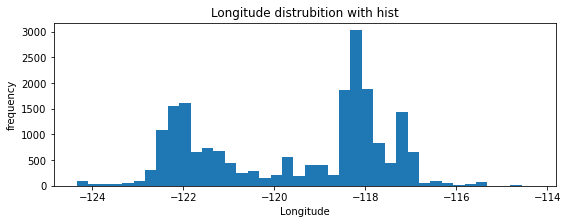

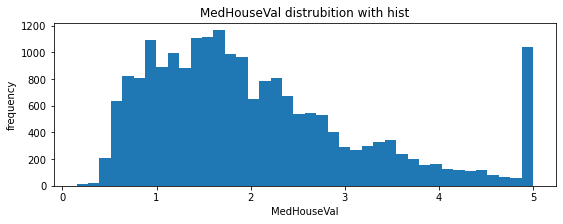

In [71]:
numericVar = ["age","trestbps","chol","thalach","oldpeak"]
for n in df.columns[df.dtypes == 'float']:
    plot_hist(n)

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

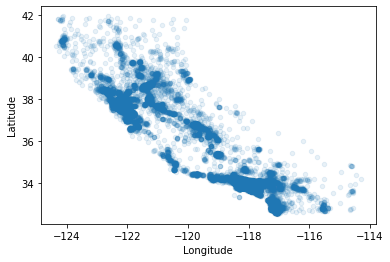

In [62]:
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

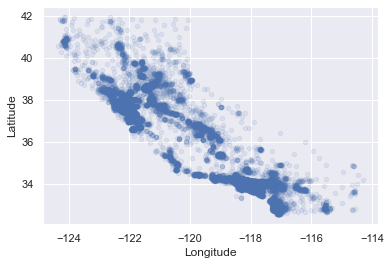

In [73]:
sns.set()
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1)

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

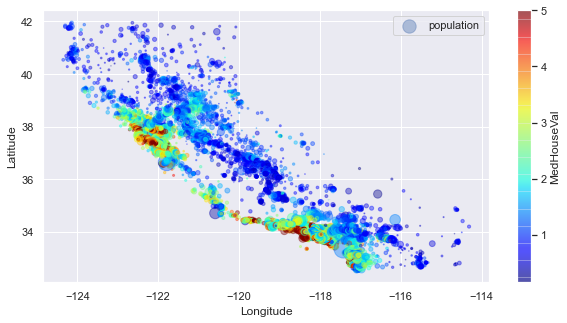

In [75]:
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
             s=df["Population"]/100, label="population", figsize=(10,5),
             c="MedHouseVal", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()